In [1]:
import os, shutil
original_dataset_dir = 'F:/Github/fyp IU/model/Data'

In [2]:
base_dir = 'F:/Github/fyp IU/model/WD'
#os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [ ]:
train_amblance_dir = os.path.join(train_dir, 'amblance')
os.mkdir(train_amblance_dir)

In [ ]:
train_fire_truck_dir = os.path.join(train_dir, 'fire_truck')
os.mkdir(train_fire_truck_dir)

In [ ]:
train_Police_dir = os.path.join(train_dir, 'Police')
os.mkdir(train_Police_dir)

In [ ]:
validation_amblance_dir = os.path.join(validation_dir, 'amblance')
os.mkdir(validation_amblance_dir)

In [ ]:
validation_fire_truck_dir = os.path.join(validation_dir, 'fire_truck')
os.mkdir(validation_fire_truck_dir)

In [ ]:
validation_Police_dir = os.path.join(validation_dir, 'Police')
os.mkdir(validation_Police_dir)

In [ ]:
test_amblance_dir = os.path.join(test_dir, 'amblance')
os.mkdir(test_amblance_dir)

In [ ]:
test_fire_truck_dir = os.path.join(test_dir, 'fire_truck')
os.mkdir(test_fire_truck_dir)

In [ ]:
test_Police_dir = os.path.join(test_dir, 'Police')
os.mkdir(test_Police_dir)

In [ ]:
fnames = ['Ambulance_  ({}).jpg'.format(i) for i in range(194)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    print(src)
    dst = os.path.join(train_amblance_dir, fname)
    print(dst)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['Ambulance_  ({}).jpg'.format(i) for i in range(194, 194+24)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_amblance_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['Ambulance_  ({}).jpg'.format(i) for i in range(194+24, 194+50)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_amblance_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['Fire_Truck_ ({}).jpg'.format(i) for i in range(164)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_fire_truck_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['Fire_Truck_ ({}).jpg'.format(i) for i in range(164, 164+20)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_fire_truck_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['Fire_Truck_ ({}).jpg'.format(i) for i in range(164+20, 164+40)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_fire_truck_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['Police_ ({}).jpg'.format(i) for i in range(171)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Police_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['Police_ ({}).jpg'.format(i) for i in range(171, 171+21)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Police_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['Police_ ({}).jpg'.format(i) for i in range(171+21, 171+42)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Police_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-2),
metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='categorical')

In [ ]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),
batch_size=50,
class_mode='categorical')

In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=20,
validation_data=validation_generator,
validation_steps=50)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))

model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))

model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))

model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())

model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(3, activation='sigmoid'))

from tensorflow.keras import optimizers
model2.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-3),
metrics=['acc'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),
batch_size=50,
class_mode='categorical')

history = model2.fit_generator(
train_generator,
steps_per_epoch=50,
epochs=5,
validation_data=validation_generator,
validation_steps=50)

Found 529 images belonging to 3 classes.
Found 65 images belonging to 3 classes.
Epoch 1/5
50/50 [==============================] - 37s 741ms/step - loss: 1.0080 - acc: 0.4703 - val_loss: 0.6624 - val_acc: 0.7385
Epoch 2/5
50/50 [==============================] - 37s 745ms/step - loss: 0.6541 - acc: 0.7290 - val_loss: 0.8469 - val_acc: 0.5077
Epoch 3/5
50/50 [==============================] - 40s 798ms/step - loss: 0.5435 - acc: 0.7740 - val_loss: 0.4155 - val_acc: 0.8923
Epoch 4/5
50/50 [==============================] - 39s 787ms/step - loss: 0.4544 - acc: 0.8395 - val_loss: 0.5154 - val_acc: 0.7385
Epoch 5/5
50/50 [==============================] - 38s 759ms/step - loss: 0.3619 - acc: 0.8738 - val_loss: 0.3162 - val_acc: 0.9077


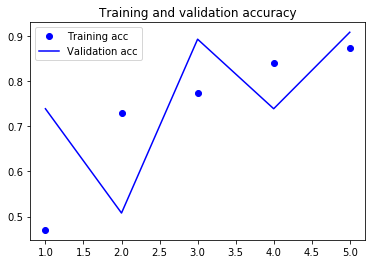

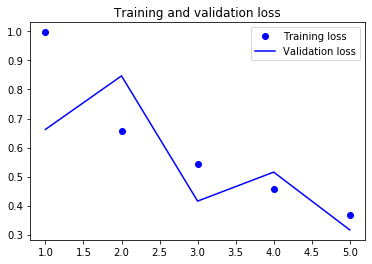

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-5a4afd21d111>, line 1)

In [9]:
x='F:/Github/fyp IU/model/WD/test/amblance/Ambulance_  (218).jpg'
model.predict(x)

AttributeError: 'str' object has no attribute 'shape'